In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



In [9]:
!pip install tensorflow opencv-python matplotlib

In [60]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
accelerate                    0.26.1
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwri

In [61]:
import tensorflow as tf
import os

In [62]:
##Avoid OOM errors by setting GPU Memory Consumption Growth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [63]:
import cv2
import imghdr

In [64]:
data_dir='data'

In [65]:
image_exts=['jpeg','jpg','bmp','png']

In [66]:
image_exts[2]

'bmp'

In [67]:
os.listdir(data_dir)

['happy', 'sad']

In [68]:
os.listdir(os.path.join(data_dir,'happy'))

['-woman-looking-at-camera-with-crossed-arms-happy-girl-standing-in-1865153395.jpg',
 '05-12-21-happy-people.jpg',
 '107307587-1695837909104-gettyimages-1446934118-istock_2022_10_17-ja1-107.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '220px-Shiny_Happy_People_Duggar_Family_Secrets_poster.jpg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '35439_hd.jpg',
 '360_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '360_F_582239379_7n6b6kBXogmFRvSz5Ncgr7aQrZBEcO1p.jpg',
 '360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '988689_Wallpaper2.jpg',
 'AF2bZyipq253P_o8jMbgb7t33mDUCYp

In [69]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [13]:
##load the data

In [70]:
import numpy as num
from matplotlib import pyplot as plt

In [71]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 258 files belonging to 2 classes.


In [72]:
data_iterator=data.as_numpy_iterator()

In [73]:
batch=data_iterator.next()

In [74]:
batch[0].shape

(32, 256, 256, 3)

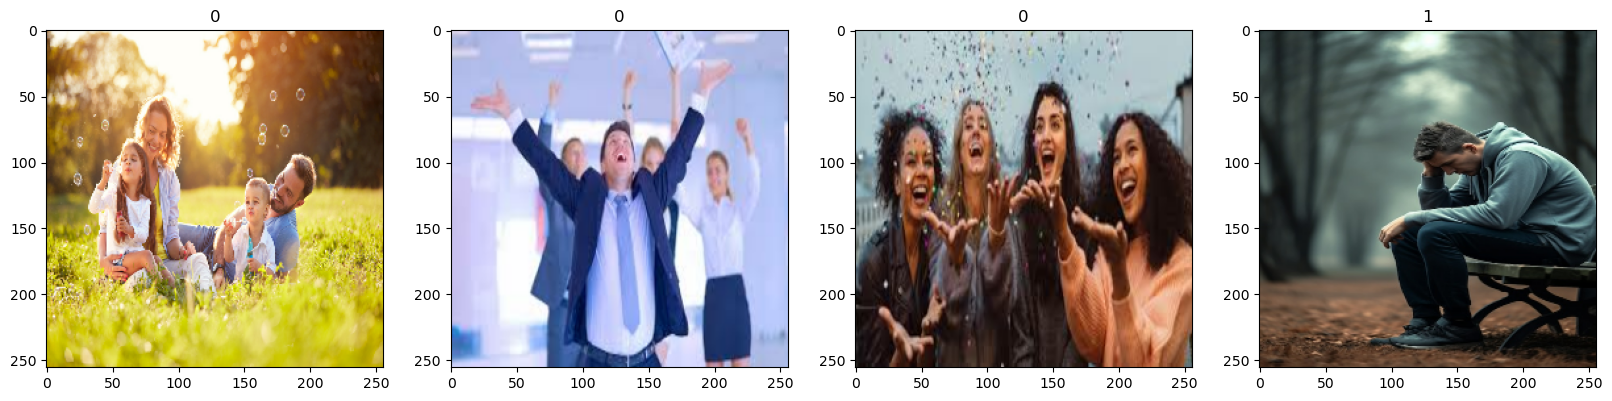

In [75]:
## class-0 fir happy people
##class-1 for sad people
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
##scale data

In [76]:
data=data.map(lambda x,y:(x/255,y))

In [77]:
data.as_numpy_iterator().next()

(array([[[[0.07058824, 0.12941177, 0.14901961],
          [0.07058824, 0.12941177, 0.14901961],
          [0.07058824, 0.12941177, 0.14901961],
          ...,
          [0.09803922, 0.1347886 , 0.16151194],
          [0.09803922, 0.13333334, 0.16078432],
          [0.09803922, 0.13333334, 0.16078432]],
 
         [[0.07058824, 0.12941177, 0.14901961],
          [0.07058824, 0.12941177, 0.14901961],
          [0.07058824, 0.12941177, 0.14901961],
          ...,
          [0.09803922, 0.1347886 , 0.16151194],
          [0.09803922, 0.13333334, 0.16078432],
          [0.09803922, 0.13333334, 0.16078432]],
 
         [[0.07058824, 0.12941177, 0.14901961],
          [0.07058824, 0.12941177, 0.14901961],
          [0.07058824, 0.12941177, 0.14901961],
          ...,
          [0.09803922, 0.1347886 , 0.16151194],
          [0.09803922, 0.13333334, 0.16078432],
          [0.09803922, 0.13333334, 0.16078432]],
 
         ...,
 
         [[0.10096163, 0.13625576, 0.1558636 ],
          [0.10257

In [28]:
##split the data

In [78]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [79]:
train_size

6

In [80]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(test_size).take(test_size)

In [32]:
##build deep learning model

In [81]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [83]:
model=Sequential()

In [84]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [85]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
##train

In [86]:
logdir='logs'

In [87]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.4987 - loss: 1.1125 - val_accuracy: 0.6562 - val_loss: 0.6166
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.5260 - loss: 0.6758 - val_accuracy: 0.8438 - val_loss: 0.5546
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.8624 - loss: 0.5496 - val_accuracy: 0.8438 - val_loss: 0.4245
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - accuracy: 0.8468 - loss: 0.3708 - val_accuracy: 0.9062 - val_loss: 0.1976
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.8588 - loss: 0.2699 - val_accuracy: 0.9062 - val_loss: 0.1991
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.9327 - loss: 0.1684 - val_accuracy: 0.9375 - val_loss: 0.1768
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.9644 - loss: 0.0997 - val_accuracy: 0.9375 - val_loss: 0.1153
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.9586 - loss: 0.1157 - val_accuracy: 0.9375 - val_loss:

In [43]:
##plot performance

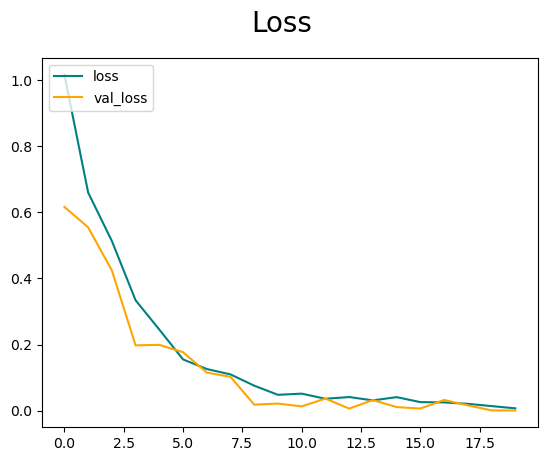

In [89]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

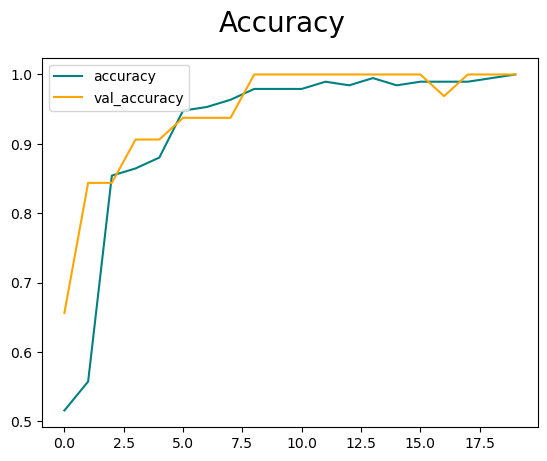

In [90]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [46]:
##Evaluate

In [91]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [92]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [93]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [94]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [55]:
##test the model

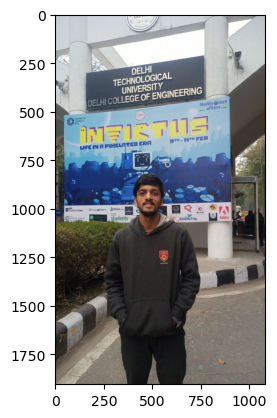

In [100]:
img=cv2.imread('akshat.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

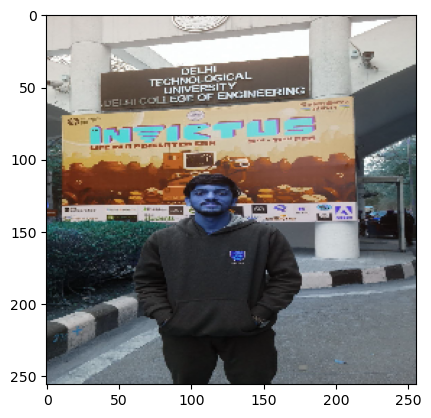

In [101]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [102]:
yhat=model.predict(num.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [103]:
yhat

array([[0.45751736]], dtype=float32)

In [104]:
if yhat > 0.5:
    print(f'Predicted Class is Sad')
else:
    print(f'Predicted Class is Happy')

Predicted Class is Happy


In [67]:
##save the model

In [68]:
from tensorflow.keras.models import load_model

In [71]:
model.save(os.path.join('models','happysadclassifier.h5'))

In [73]:
new_model=load_model(os.path.join('models','happysadclassifier.h5'))

In [74]:
yhatnew=model.predict(num.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [75]:
yhatnew

array([[0.9222192]], dtype=float32)

In [76]:
if yhatnew > 0.5:
    print(f'Predicted Class is Sad')
else:
    print(f'Predicted Class is Happy')

Predicted Class is Sad
